# Basic Imports

In [461]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [2]:
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srirsri2/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Loading the Data

In [3]:
data = pd.read_csv('blog-authorship-corpus.zip')

# Basic EDA

In [5]:
data.shape

(681284, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [7]:
data.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [8]:
data.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

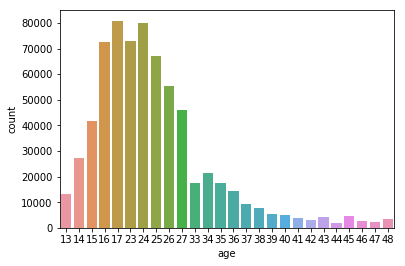

In [9]:
data['age'].value_counts()
sns.countplot(data['age'])

male      345193
female    336091
Name: gender, dtype: int64


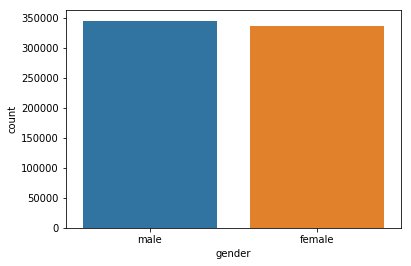

In [10]:
print(data['gender'].value_counts())
sns.countplot(data['gender'])

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64


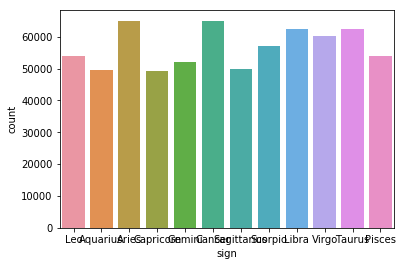

In [11]:
print(data['sign'].value_counts())
sns.countplot(data['sign'])

# Preprocessing the Data

1. Removing Unwanted Characters
2. Converting all the text to lower case
3. Removing unwanters spaces
4. Removing all the ENGLISH stop words

In [58]:
stop_words = set(stopwords.words('english'))

In [59]:
import re, string

def clean_str(string):
  """
  String cleaning before vectorization
  """
  try:    
    string = re.sub(r'^https?:\/\/<>.*[\r\n]*', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    #words = [w for w in words if len(w)>=1]
    words = [w for w in words if not w in stop_words]
    return " ".join(words)	
  except:
    return ""

In [311]:
def clean_str_topic(string):
  """
  String cleaning before vectorization
  """
  try:
    string = re.sub(r"[^A-Za-z]", "", string)         
    words = string.strip().lower().split()    
    #words = [w for w in words if len(w)>=1]
    words = [w for w in words if not w in stop_words]
    return " ".join(words)	
  except:
    return ""

In [350]:
data_sample = data[0:10000]

In [351]:
data_sample['text'] = data_sample['text'].apply(clean_str)

/Users/srirsri2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [352]:
data_sample['topic'] = data_sample['topic'].apply(clean_str_topic)
data_sample['sign'] = data_sample['sign'].apply(clean_str_topic)

/Users/srirsri2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/srirsri2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [353]:
data_sample.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,student,leo,"14,May,2004",info found pages mb pdf files wait untill team...
1,2059027,male,15,student,leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,student,leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,student,leo,"12,May,2004",testing testing
4,3581210,male,33,investmentbanking,aquarius,"11,June,2004",thanks yahoo toolbar capture urls popups means...
5,3581210,male,33,investmentbanking,aquarius,"10,June,2004",interesting conversation dad morning talking k...
6,3581210,male,33,investmentbanking,aquarius,"10,June,2004",somehow coca cola way summing things well earl...
7,3581210,male,33,investmentbanking,aquarius,"10,June,2004",anything korea country extremes everything see...
8,3581210,male,33,investmentbanking,aquarius,"10,June,2004",take read news article urllink joongang ilbo n...
9,3581210,male,33,investmentbanking,aquarius,"09,June,2004",surf english news sites lot looking tidbits ko...


In [354]:
data_sample['topic'].value_counts()

indunk                    3287
technology                2654
fashion                   1622
student                   1137
education                  270
marketing                  156
engineering                127
internet                   118
communicationsmedia         99
businessservices            91
sportsrecreation            80
nonprofit                   71
investmentbanking           70
science                     63
arts                        45
consulting                  21
museumslibraries            17
banking                     16
automotive                  14
law                         11
lawenforcementsecurity      10
religion                     9
publishing                   4
accounting                   4
telecommunications           2
humanresources               2
Name: topic, dtype: int64

In [355]:
#data['text'] = data['text'].apply(clean_str)

In [356]:
#data.info()
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
id        10000 non-null int64
gender    10000 non-null object
age       10000 non-null int64
topic     10000 non-null object
sign      10000 non-null object
date      10000 non-null object
text      10000 non-null object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


**Merging "Gender, Age, Topic and Sign" into a single feature**

In [357]:
cols = ['gender','age','topic','sign']
#data['labels'] = data[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
data_sample['labels'] = data_sample[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

/Users/srirsri2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [358]:
data_sample.head()

,id,gender,age,topic,sign,date,text,labels
0,2059027,male,15,student,leo,"14,May,2004",info found pages mb pdf files wait untill team...,"male,15,student,leo"
1,2059027,male,15,student,leo,"13,May,2004",team members drewes van der laag urllink mail ...,"male,15,student,leo"
2,2059027,male,15,student,leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...,"male,15,student,leo"
3,2059027,male,15,student,leo,"12,May,2004",testing testing,"male,15,student,leo"
4,3581210,male,33,investmentbanking,aquarius,"11,June,2004",thanks yahoo toolbar capture urls popups means...,"male,33,investmentbanking,aquarius"


In [359]:
#data_new = data[['text','labels']]
data_new = data_sample[['text','labels']]

In [360]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
text      10000 non-null object
labels    10000 non-null object
dtypes: object(2)
memory usage: 156.3+ KB


In [361]:
data_new.head()

,text,labels
0,info found pages mb pdf files wait untill team...,"male,15,student,leo"
1,team members drewes van der laag urllink mail ...,"male,15,student,leo"
2,het kader van kernfusie op aarde maak je eigen...,"male,15,student,leo"
3,testing testing,"male,15,student,leo"
4,thanks yahoo toolbar capture urls popups means...,"male,33,investmentbanking,aquarius"


# Train Test Split

In [362]:
X_train, X_test, y_train, y_test = train_test_split(data_new.text, data_new.labels, random_state=42, test_size=0.2)

# Tokenization & Vectorization

In [363]:
from sklearn.feature_extraction.text import CountVectorizer

In [364]:
cVect = CountVectorizer(ngram_range=(1,2))

In [365]:
cVect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [366]:
len(cVect.vocabulary_)

537153

**Document Term Matrix(DTM) for Train & Test**

In [367]:
X_train_ct = cVect.transform(X_train)

In [368]:
X_train_ct.shape

(8000, 537153)

In [369]:
X_train_ct[0]

<1x537153 sparse matrix of type '<class 'numpy.int64'>'
	with 1659 stored elements in Compressed Sparse Row format>

In [370]:
print(X_train_ct[0])

  (0, 235)	1
  (0, 238)	1
  (0, 769)	1
  (0, 779)	1
  (0, 2128)	2
  (0, 2146)	1
  (0, 2152)	1
  (0, 2430)	3
  (0, 2438)	1
  (0, 2463)	1
  (0, 2476)	1
  (0, 2764)	1
  (0, 2819)	1
  (0, 3950)	1
  (0, 3972)	1
  (0, 4662)	1
  (0, 4664)	1
  (0, 6071)	2
  (0, 6073)	1
  (0, 6074)	1
  (0, 6105)	1
  (0, 6120)	1
  (0, 6378)	1
  (0, 6387)	1
  (0, 6892)	1
  :	:
  (0, 527588)	1
  (0, 527986)	2
  (0, 528380)	1
  (0, 528687)	1
  (0, 529739)	1
  (0, 529988)	1
  (0, 530482)	1
  (0, 530688)	1
  (0, 532729)	1
  (0, 532882)	1
  (0, 533356)	2
  (0, 533365)	1
  (0, 533696)	1
  (0, 535092)	3
  (0, 535206)	1
  (0, 535284)	1
  (0, 535444)	1
  (0, 535995)	6
  (0, 536070)	2
  (0, 536073)	1
  (0, 536080)	1
  (0, 536088)	1
  (0, 536126)	1
  (0, 536264)	1
  (0, 536270)	1


In [371]:
X_test_ct = cVect.transform(X_test)

In [372]:
X_test_ct.shape

(2000, 537153)

In [373]:
X_test_ct[0]

<1x537153 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [374]:
print(X_test_ct[0])

  (0, 47574)	1
  (0, 58487)	1
  (0, 93830)	1
  (0, 126680)	1
  (0, 139635)	1
  (0, 186811)	1
  (0, 217333)	1
  (0, 300509)	1
  (0, 339875)	1
  (0, 348495)	1
  (0, 348817)	1
  (0, 371608)	1
  (0, 421265)	1
  (0, 443743)	1
  (0, 444032)	1
  (0, 447726)	1
  (0, 461310)	1
  (0, 464299)	1
  (0, 500832)	1
  (0, 501491)	1


# Dictionary For Labels

In [375]:
labelVector = CountVectorizer()

In [376]:
label_ct = labelVector.fit_transform(data_new['labels'])

In [377]:
print("Number of Unique Labels : ", len(labelVector.vocabulary_))

Number of Unique Labels :  64


In [378]:
labelVector.get_feature_names()

['13',
 '14',
 '15',
 '16',
 '17',
 '23',
 '24',
 '25',
 '26',
 '27',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 'accounting',
 'aquarius',
 'aries',
 'arts',
 'automotive',
 'banking',
 'businessservices',
 'cancer',
 'capricorn',
 'communicationsmedia',
 'consulting',
 'education',
 'engineering',
 'fashion',
 'female',
 'gemini',
 'humanresources',
 'indunk',
 'internet',
 'investmentbanking',
 'law',
 'lawenforcementsecurity',
 'leo',
 'libra',
 'male',
 'marketing',
 'museumslibraries',
 'nonprofit',
 'pisces',
 'publishing',
 'religion',
 'sagittarius',
 'science',
 'scorpio',
 'sportsrecreation',
 'student',
 'taurus',
 'technology',
 'telecommunications',
 'virgo']

**Dictionary of All Labels (Only from Samples)**

In [401]:
labels_dict = labelVector.vocabulary_

In [402]:
labels_dict

{'male': 48,
 '15': 2,
 'student': 59,
 'leo': 46,
 '33': 10,
 'investmentbanking': 43,
 'aquarius': 25,
 'female': 38,
 '14': 1,
 'indunk': 41,
 'aries': 26,
 '25': 7,
 'capricorn': 32,
 '17': 4,
 'gemini': 39,
 '23': 5,
 'nonprofit': 51,
 'cancer': 31,
 'banking': 29,
 '37': 14,
 'sagittarius': 55,
 '26': 8,
 '24': 6,
 'scorpio': 57,
 '27': 9,
 'education': 35,
 '45': 22,
 'engineering': 36,
 'libra': 47,
 'science': 56,
 '34': 11,
 '41': 18,
 'communicationsmedia': 33,
 'businessservices': 30,
 'sportsrecreation': 58,
 'virgo': 63,
 'taurus': 60,
 'arts': 27,
 'pisces': 52,
 '44': 21,
 '16': 3,
 'internet': 42,
 'museumslibraries': 50,
 'accounting': 24,
 '39': 16,
 '35': 12,
 'technology': 61,
 '36': 13,
 'law': 44,
 '46': 23,
 'consulting': 34,
 'automotive': 28,
 '42': 19,
 'religion': 54,
 '13': 0,
 'fashion': 37,
 '38': 15,
 '43': 20,
 'publishing': 53,
 '40': 17,
 'marketing': 49,
 'lawenforcementsecurity': 45,
 'humanresources': 40,
 'telecommunications': 62}

# Label Transformation to Binary Form

In [380]:
y_train = [set(i.split(',')) for i in y_train]
y_test = [set(i.split(',')) for i in y_test]

In [381]:
y_labels = [set(i.split(',')) for i in data_new.labels]

In [382]:
len(y_labels[0])

4

In [383]:
print(y_train[0])
print(y_test[0])

{'lawenforcementsecurity', 'aquarius', '37', 'male'}
{'consulting', '23', 'taurus', 'male'}


In [384]:
from sklearn.preprocessing import MultiLabelBinarizer

In [385]:
mlb = MultiLabelBinarizer(classes=labelVector.get_feature_names())

In [386]:
#mlb.fit(y_labels)

In [387]:
y_train = mlb.fit_transform(y_train)
y_test = mlb.fit_transform(y_test)

In [388]:
print("Train : ", len(y_train[0]))
print("Test : ", len(y_test[0]))

Train :  64
Test :  64


In [389]:
len(mlb.classes_)

64

In [390]:
y_labels_mlb = mlb.transform(y_labels)

In [391]:
len(y_labels_mlb[0])

64

# One vs Rest Classification

In [392]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [393]:
lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
ovr_clf = OneVsRestClassifier(lr_clf)

In [394]:
ovr_clf.fit(X_train_ct, y_train)

/Users/srirsri2/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 17 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [395]:
y_pred = ovr_clf.predict(X_test_ct)

# Measuring the Accuracy

In [396]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

from functools import partial

In [486]:
def print_scores(y_true, y_pred, type='all'):
  
    scores = []
    avg_method = ['macro', 'micro', 'weighted']
    
    for avg in avg_method: 
        if type in ['all','f1']:
            f1_sc = partial(f1_score, average=avg)
            print(" F1 Score("+avg+") : ", f1_sc(y_true, y_pred))
            #f1_micro = partial(f1_score, average='micro')
            #print(" F1 Score(Micro) : ", f1_micro(y_true, y_pred))
            #f1_weighted = partial(f1_score, average='weighted')
            #print(" F1 Score(Weighted) : ", f1_weighted(y_true, y_pred))
            #scores = scores + [f1_macro, f1_micro, f1_weighted]
    
        if type in ['all','avg']:
            avg_prec_sc = partial(average_precision_score, average=avg)
            print(" Average Precision Score("+avg+") : ", avg_prec_sc(y_true, y_pred))
            #avg_prec_score_micro = partial(average_precision_score, average='micro')
            #avg_prec_score_weighted = partial(average_precision_score, average='weighted')
            #scores = scores + [avg_prec_score_macro, avg_prec_score_micro, avg_prec_score_weighted]
    
        if type in ['all','recall']:
            recall_sc = partial(recall_score, average=avg)
            print(" Recall Score("+avg+") : ", recall_sc(y_true, y_pred))
            #recall_score_micro = partial(recall_score, average='micro')
            #recall_score_weighted = partial(recall_score, average='weighted')
            #scores = scores + [recall_score_macro, recall_score_micro, recall_score_weighted]

    #for score in scores:
    #    print(score, score(y_true, y_pred))

In [477]:
print(" === Accuracy Score ==== " , accuracy_score(y_test, y_pred))

 === Accuracy Score ====  0.3195


In [487]:
print(" ======= F1 Score ======== ")
print_scores(y_test, y_pred, type='f1')

 ======= F1 Score ======== 
 F1 Score(macro) :  0.2645626442962634
 F1 Score(micro) :  0.6518048276371152
 F1 Score(weighted) :  0.6142350363701736


In [488]:
print(" ======= Recall ======== ")
print_scores(y_test, y_pred, type='recall')

 ======= Recall ======== 
 Recall Score(macro) :  0.20190579865720565
 Recall Score(micro) :  0.551875
 Recall Score(weighted) :  0.551875


In [489]:
print(" ======= Average Precission Score  ======== ")
print_scores(y_test, y_pred, type='avg')

 ======= Average Precission Score  ======== 
 Average Precision Score(macro) :  nan
 Average Precision Score(micro) :  0.46725932232513073
 Average Precision Score(weighted) :  nan


In [490]:
print(y_test[0], y_pred[0])

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [494]:
y_pred_inv = mlb.inverse_transform(y_pred)
y_test_inv = mlb.inverse_transform(y_test)

In [504]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [508]:
def print_true_vs_pred(n=5):
    for i in range(1,n):
        print(color.BOLD + "Actual : " + color.END, y_test_inv[i] , color.BOLD + " Predicted : " +color.END , y_pred_inv[i])

In [509]:
print_true_vs_pred(10)

Actual :  ('17', 'aquarius', 'indunk', 'male')  Predicted :  ('female', 'indunk')
Actual :  ('35', 'aries', 'male', 'technology')  Predicted :  ('aries', 'male')
Actual :  ('23', 'aquarius', 'automotive', 'female')  Predicted :  ('17', 'automotive', 'female', 'indunk', 'scorpio')
Actual :  ('34', 'female', 'indunk', 'sagittarius')  Predicted :  ('34', 'female', 'indunk', 'sagittarius')
Actual :  ('36', 'aries', 'fashion', 'male')  Predicted :  ('male',)
Actual :  ('24', 'engineering', 'libra', 'male')  Predicted :  ('35', 'aries', 'male', 'technology')
Actual :  ('17', 'female', 'indunk', 'scorpio')  Predicted :  ('female',)
Actual :  ('36', 'aries', 'fashion', 'male')  Predicted :  ('36', 'aries', 'fashion', 'male')
Actual :  ('24', 'female', 'indunk', 'scorpio')  Predicted :  ('male',)
